# Chapter 8: Demo Undersampling

In [56]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [57]:
data = pd.read_csv('points.csv', index_col=0)

In [59]:
data.head()

,0,1,target
0,-2.473300,0.569620,0
1,-1.283776,0.576974,1
2,1.428302,0.629649,1
3,2.071399,1.389588,1
4,1.247005,1.123625,1


In [60]:
from collections import Counter

In [61]:
print(Counter(data['target']).items())

dict_items([(0, 815), (1, 14185)])


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt


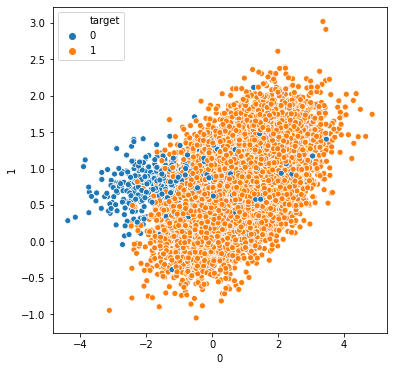

In [63]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=data, x='0', y='1', hue='target')
plt.show()

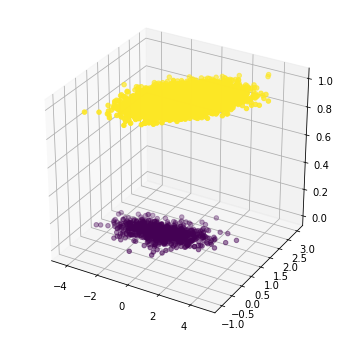

In [64]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['0'], data['1'], data['target'], 
           c=data['target'])
plt.show()

## RandomUnderSample

In [65]:
X = data[['0','1']]
y = data.target

In [66]:
from imblearn.under_sampling import RandomUnderSampler
rs = RandomUnderSampler()
X_rs, y_rs = rs.fit_resample(X,y)
print(sorted(Counter(y_rs).items()))

[(0, 815), (1, 815)]


In [67]:
data_rs = pd.DataFrame(X_rs)
data_rs['target'] = y_rs
data_rs.head()

,0,1,target
0,-2.473300,0.569620,0
1,-1.655427,1.168923,0
2,-0.012906,0.989231,0
3,-0.841488,0.212281,0
4,1.169471,1.035011,0


In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=data_rs, x='0', y='1', hue='target')
plt.show()

## ClusterCentroids

In [ ]:
# Phương pháp này không hướng dẫn vì thời gian thực hiện khá lâu
# from imblearn.under_sampling import ClusterCentroids
# cc = ClusterCentroids()
# X_cc, y_cc = cc.fit_resample(X,y)
# print(sorted(Counter(y_cc).items()))

In [ ]:
# data_cc = pd.DataFrame(X_cc)
# data_cc['target'] = y_cc
# data_cc.head()

In [ ]:
# plt.figure(figsize=(6,6))
# sns.swarmplot(data=data_cc, x='0', y='1', hue='target')
# plt.show()

## Resample

In [ ]:
# replace=True: Implements resampling with replacement. If False, this will implement (sliced) random permutations.
# tham khảo https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

In [ ]:
data_0 = data[data.target==0]
data_1 = data[data.target==1]

In [ ]:
data_0.shape

In [ ]:
data_1.shape

In [ ]:
from sklearn.utils import resample

In [ ]:
data_1_resample = resample(data_1,
                       replace = False, # sample without replacement
                       n_samples = data_0.shape[0], # match minority n
                       random_state = 27) # reproducible results

In [ ]:
downsampled = pd.concat([data_0, data_1_resample])

In [ ]:
downsampled.target.value_counts()

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=downsampled, x='0', y='1', hue='target')
plt.show()